In [1]:
# You must run this cell, but you can ignore its contents.

import hashlib

def ads_hash(ty):
    """Return a unique string for input"""
    ty_str = str(ty).encode()
    m = hashlib.sha256()
    m.update(ty_str)
    return m.hexdigest()[:10]

## Numpy array for images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Images are saved in computers as arrays of numbers. In Python, the library called `numpy` (often abbreviated `np` for short). is the most common way to manipulate arrays of numbers. Here we will create an 8x8 pixel image and put it in the variable `check`.

In [3]:
# Create a variable called `check` which will contain an 8x8 array of numbers.
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
check

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

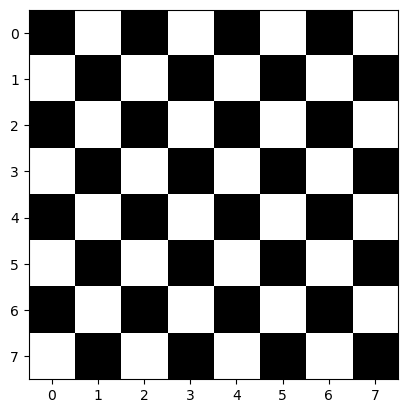

In [4]:
# Now lets view our 8x8 pixel image:
plt.imshow(check, cmap='gray');

## Questions Part A - Image representation

Use numpy slicing to set the values in an array:

- Use `plt.imshow` to show a new 8x8 pixel image in which the top half is white and the bottom half is black.
- Use `plt.imshow` to show a new 8x8 pixel image in which the left half is white and the right half is black.

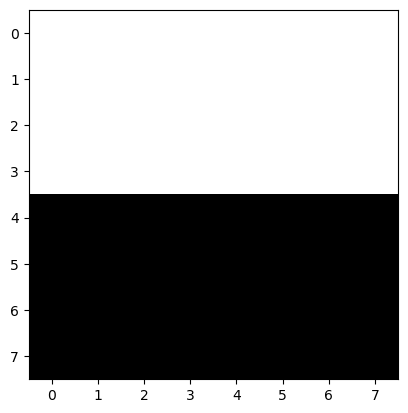

In [5]:
# The top half is white and the bottom half is black.
arr = np.zeros((8,8))
arr[:4,:] = 1
plt.imshow(arr, cmap='gray');

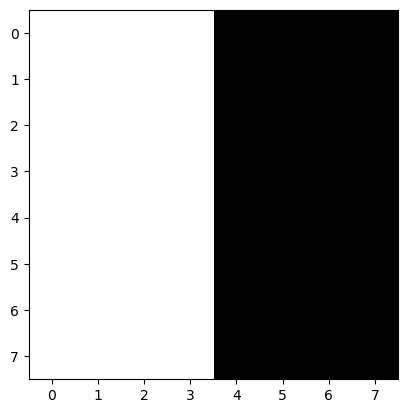

In [6]:
# The left half is white and the right half is black.
arr = np.zeros((8,8))
arr[:,:4] = 1
plt.imshow(arr, cmap='gray');

## Questions Part B - More image representation

Write the numerical value corresponding with each pixel. In other words, what number corresponds with the black color and which number corresponds with the white color?

In [7]:
# Type your answer here and then run this and the following cell.
black = 'replace this with your answer'
white = 'replace this with your answer'

black = 0
white = 1

In [8]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(float(black))=='8aed642bf5'
assert ads_hash(float(white))=='d0ff5974b6'

## Questions Part C - More image representation and contrast enhancement

Now let's look at a more interesting image. We will use data included with the library `skimage` (also called scikit-image). The homepage for scikit-image is [here](http://scikit-image.org/).

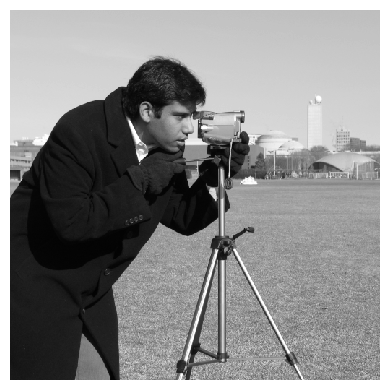

In [9]:
from skimage import data

# Load the sample image data into a variable called `camera`.
camera = data.camera()

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

So, let's checkout some things about the image. How many pixels are here? Put your answer in the `num_pixels` variable.

In [10]:
# Type your answer here and then run this and the following cell.
num_pixels = camera.shape[0]*camera.shape[1]

In [11]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(num_pixels)=='54faea9b3e'

What is the distribution of luminance values in the image?

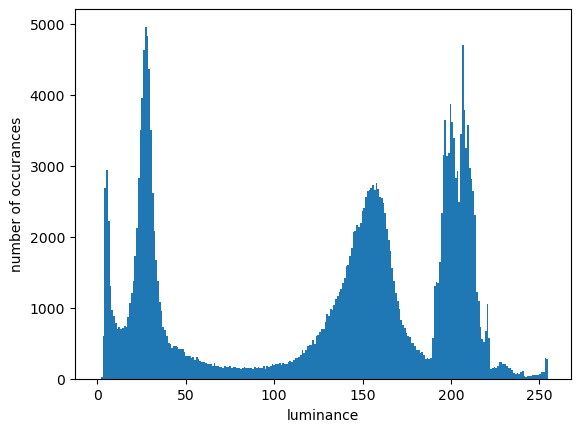

In [12]:
plt.hist(camera.flat,bins=256);
plt.xlabel('luminance');
plt.ylabel('number of occurances');

We can see that there are two main peaks in the intensity histogram. We can also see that the intensities go from 0 to 255. This happens to be the range of values that fit in an 8 bit *byte*. This is the unit of memory size on modern computers. Is it correct to think that each pixel in this image is stored as a byte?


In [13]:
camera.dtype

dtype('uint8')

The `dtype` of a numpy array is the "data type" - the type for each individual element of the array. Above we see the answer is `uint8` which means "unsigned integer, 8 bits". So, yes, each pixel is stored here as a byte.

If you look at the histogram, you can see that there is some part of the luminance space which has very few occurances, namely above a luminance value of about 220. We can probably make better use of the 0-255 dynamic range available.

In the cell below, enter a scale factor which fills the histogram of possible luminances more completely but does not cause too much clipping of the image values. The tower in the background should still be visible, for example. Look at the figures below to judge the effect of changing the scale factor. Put this in the variable `scale_factor`.

In [14]:
scale_factor = 255/220

In [15]:
# assert that scale_factor is a number
assert scale_factor - 0.0 == scale_factor

Let's look at the histogram of rescaled luminances.

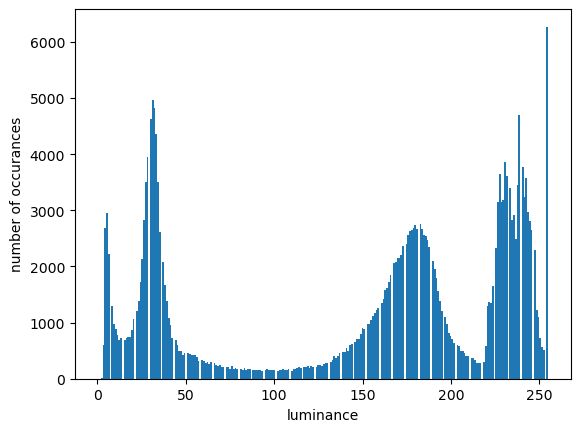

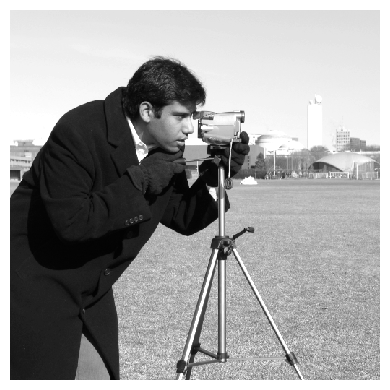

In [16]:
rescaled = np.clip(scale_factor*camera.astype(np.float32),0,255).astype(np.uint8)
plt.hist(rescaled.flat,bins=256);
plt.xlabel('luminance');
plt.ylabel('number of occurances');

plt.figure(figsize=(4, 4))
plt.imshow(rescaled, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.axis('off')
plt.tight_layout()
plt.show()